In [2]:
import pandas as pd
from pathlib import Path
from sad2_final_project.analysis import add_missing_metrics_from_experiment, loader_obsolete_data
from sad2_final_project.bnfinder import load_external_data

# plots
## global
import matplotlib.pyplot as plt
import seaborn as sns
## local
from sad2_final_project.analysis import plot_boxplot, plot_histogram
# system 
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data/trajectory_length_vs_attractors1')

/home/maxi7524/repositories/SAD2_final_project


In [3]:
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
metrics_list=['TP', 'FP', 'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']
# df = add_missing_metrics_from_experiment(df, DATA_PATH, metrics_list, after_column='attractor_ratio')
df

,condition_id_num,dataset_succeeded,attractor_ratio,TP,FP,FN,precision,recall,sensitivity,AHD,...,BDe,num_nodes,update_mode,trajectory_length,n_trajectories,sampling_frequency,score_function,n_parents_per_node,rep_id,condition_id_name
0,0,False,0.776667,7.0,3.0,4.0,0.700000,0.636364,0.636364,0.350000,...,2093.753183,5,synchronous,10,50,1,MDL,"[1, 2, 3]",0,0000
1,1,False,0.744000,4.0,7.0,2.0,0.363636,0.666667,0.666667,0.450000,...,3525.393371,5,synchronous,10,50,1,MDL,"[1, 2, 3]",1,0001
2,2,False,0.851333,8.0,2.0,2.0,0.800000,0.800000,0.800000,0.200000,...,3089.352225,5,synchronous,10,50,1,MDL,"[1, 2, 3]",2,0002
3,3,False,0.844000,4.0,4.0,3.0,0.500000,0.571429,0.571429,0.583333,...,3298.020597,5,synchronous,10,50,1,MDL,"[1, 2, 3]",3,0003
4,4,False,0.862667,5.0,1.0,0.0,0.833333,1.000000,1.000000,0.050000,...,4801.738920,5,synchronous,10,50,1,MDL,"[1, 2, 3]",4,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,23395,True,0.587805,12.0,2.0,3.0,0.857143,0.800000,0.800000,0.069444,...,3650.863750,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",25,23395
23396,23396,False,0.996585,15.0,8.0,3.0,0.652174,0.833333,0.833333,0.152778,...,14077.049997,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",26,23396
23397,23397,False,1.000000,12.0,11.0,1.0,0.521739,0.923077,0.923077,0.166667,...,12617.349198,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",27,23397
23398,23398,True,0.542195,12.0,5.0,5.0,0.705882,0.705882,0.705882,0.138889,...,3865.383110,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",28,23398


CZĘŚĆ 2

In [5]:
from sad2_final_project.analysis import analyze_datasets_from_index

## DROPPING VALUES |
df_series = df.copy()
### dropping values after 
df_series['scale'] = df_series["trajectory_length"] / df_series["num_nodes"]
df_series = df_series[df_series['scale'] < 1.5]
### dropping sets that have no sense
df_series = df_series[
    (df_series["trajectory_length"] / df_series["sampling_frequency"]) > 1
]
## calculate series 
df_series = add_missing_metrics_from_experiment(df_series, DATA_PATH, metrics_list, after_column='attractor_ratio')
df_series = analyze_datasets_from_index(df_series, 'condition_id_name', DATA_PATH, 1)

[Progress] 3601/8040 conditions completed (44.8%)
[Progress] 3602/8040 conditions completed (44.8%)
[Progress] 3603/8040 conditions completed (44.8%)
[Progress] 3604/8040 conditions completed (44.8%)
[Progress] 3605/8040 conditions completed (44.8%)
[Progress] 3606/8040 conditions completed (44.9%)
[Progress] 3607/8040 conditions completed (44.9%)
[Progress] 3608/8040 conditions completed (44.9%)
[Progress] 3609/8040 conditions completed (44.9%)
[Progress] 3610/8040 conditions completed (44.9%)
[Progress] 3611/8040 conditions completed (44.9%)
[Progress] 3612/8040 conditions completed (44.9%)
[Progress] 3613/8040 conditions completed (44.9%)
[Progress] 3614/8040 conditions completed (45.0%)
[Progress] 3615/8040 conditions completed (45.0%)
[Progress] 3616/8040 conditions completed (45.0%)
[Progress] 3617/8040 conditions completed (45.0%)
[Progress] 3618/8040 conditions completed (45.0%)
[Progress] 3619/8040 conditions completed (45.0%)
[Progress] 3620/8040 conditions completed (45.0%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 3884/8040 conditions completed (48.3%)
[Progress] 3885/8040 conditions completed (48.3%)
[Progress] 3886/8040 conditions completed (48.3%)
[Progress] 3887/8040 conditions completed (48.3%)
[Progress] 3888/8040 conditions completed (48.4%)
[Progress] 3889/8040 conditions completed (48.4%)
[Progress] 3890/8040 conditions completed (48.4%)
[Progress] 3891/8040 conditions completed (48.4%)
[Progress] 3892/8040 conditions completed (48.4%)
[Progress] 3893/8040 conditions completed (48.4%)
[Progress] 3894/8040 conditions completed (48.4%)
[Progress] 3895/8040 conditions completed (48.4%)
[Progress] 3896/8040 conditions completed (48.5%)
[Progress] 3897/8040 conditions completed (48.5%)
[Progress] 3898/8040 conditions completed (48.5%)
[Progress] 3899/8040 conditions completed (48.5%)
[Progress] 5401/8040 conditions completed (67.2%)
[Progress] 5402/8040 conditions completed (67.2%)
[Progress] 5403/8040 conditions completed (67.2%)
[Progress] 5404/8040 conditions completed (67.2%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 9034/8040 conditions completed (112.4%)
[Progress] 9035/8040 conditions completed (112.4%)
[Progress] 9036/8040 conditions completed (112.4%)
[Progress] 9037/8040 conditions completed (112.4%)
[Progress] 9038/8040 conditions completed (112.4%)
[Progress] 9039/8040 conditions completed (112.4%)
[Progress] 9040/8040 conditions completed (112.4%)
[Progress] 9041/8040 conditions completed (112.5%)
[Progress] 9042/8040 conditions completed (112.5%)
[Progress] 9043/8040 conditions completed (112.5%)
[Progress] 9044/8040 conditions completed (112.5%)
[Progress] 9045/8040 conditions completed (112.5%)
[Progress] 9046/8040 conditions completed (112.5%)
[Progress] 9047/8040 conditions completed (112.5%)
[Progress] 9048/8040 conditions completed (112.5%)
[Progress] 9049/8040 conditions completed (112.5%)
[Progress] 9050/8040 conditions completed (112.6%)
[Progress] 9051/8040 conditions completed (112.6%)
[Progress] 9052/8040 conditions completed (112.6%)
[Progress] 9053/8040 conditions

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 11120/8040 conditions completed (138.3%)
[Progress] 11121/8040 conditions completed (138.3%)
[Progress] 11122/8040 conditions completed (138.3%)
[Progress] 11123/8040 conditions completed (138.3%)
[Progress] 11124/8040 conditions completed (138.4%)
[Progress] 11125/8040 conditions completed (138.4%)
[Progress] 11126/8040 conditions completed (138.4%)
[Progress] 11127/8040 conditions completed (138.4%)
[Progress] 11128/8040 conditions completed (138.4%)
[Progress] 11129/8040 conditions completed (138.4%)
[Progress] 11130/8040 conditions completed (138.4%)
[Progress] 11131/8040 conditions completed (138.4%)
[Progress] 11132/8040 conditions completed (138.5%)
[Progress] 11133/8040 conditions completed (138.5%)
[Progress] 11134/8040 conditions completed (138.5%)
[Progress] 11135/8040 conditions completed (138.5%)
[Progress] 11136/8040 conditions completed (138.5%)
[Progress] 11137/8040 conditions completed (138.5%)
[Progress] 11138/8040 conditions completed (138.5%)
[Progress] 1

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 11373/8040 conditions completed (141.5%)
[Progress] 11374/8040 conditions completed (141.5%)
[Progress] 11375/8040 conditions completed (141.5%)
[Progress] 11376/8040 conditions completed (141.5%)
[Progress] 11377/8040 conditions completed (141.5%)
[Progress] 11378/8040 conditions completed (141.5%)
[Progress] 11379/8040 conditions completed (141.5%)
[Progress] 11380/8040 conditions completed (141.5%)
[Progress] 11381/8040 conditions completed (141.6%)
[Progress] 11382/8040 conditions completed (141.6%)
[Progress] 11383/8040 conditions completed (141.6%)
[Progress] 11384/8040 conditions completed (141.6%)
[Progress] 11385/8040 conditions completed (141.6%)
[Progress] 11386/8040 conditions completed (141.6%)
[Progress] 11387/8040 conditions completed (141.6%)
[Progress] 11388/8040 conditions completed (141.6%)
[Progress] 11389/8040 conditions completed (141.7%)
[Progress] 11390/8040 conditions completed (141.7%)
[Progress] 11391/8040 conditions completed (141.7%)
[Progress] 1

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 18914/8040 conditions completed (235.2%)
[Progress] 18915/8040 conditions completed (235.3%)
[Progress] 18916/8040 conditions completed (235.3%)
[Progress] 18917/8040 conditions completed (235.3%)
[Progress] 18918/8040 conditions completed (235.3%)
[Progress] 18919/8040 conditions completed (235.3%)
[Progress] 18920/8040 conditions completed (235.3%)
[Progress] 18921/8040 conditions completed (235.3%)
[Progress] 18922/8040 conditions completed (235.3%)
[Progress] 18923/8040 conditions completed (235.4%)
[Progress] 18924/8040 conditions completed (235.4%)
[Progress] 18925/8040 conditions completed (235.4%)
[Progress] 18926/8040 conditions completed (235.4%)
[Progress] 18927/8040 conditions completed (235.4%)
[Progress] 18928/8040 conditions completed (235.4%)
[Progress] 18929/8040 conditions completed (235.4%)
[Progress] 18930/8040 conditions completed (235.4%)
[Progress] 18931/8040 conditions completed (235.5%)
[Progress] 18932/8040 conditions completed (235.5%)
[Progress] 1

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 19257/8040 conditions completed (239.5%)
[Progress] 19258/8040 conditions completed (239.5%)
[Progress] 19259/8040 conditions completed (239.5%)
[Progress] 19260/8040 conditions completed (239.6%)
[Progress] 19261/8040 conditions completed (239.6%)
[Progress] 19262/8040 conditions completed (239.6%)
[Progress] 19263/8040 conditions completed (239.6%)
[Progress] 19264/8040 conditions completed (239.6%)
[Progress] 19265/8040 conditions completed (239.6%)
[Progress] 19266/8040 conditions completed (239.6%)
[Progress] 19267/8040 conditions completed (239.6%)
[Progress] 19268/8040 conditions completed (239.7%)
[Progress] 19269/8040 conditions completed (239.7%)
[Progress] 19270/8040 conditions completed (239.7%)
[Progress] 19271/8040 conditions completed (239.7%)
[Progress] 19272/8040 conditions completed (239.7%)
[Progress] 19273/8040 conditions completed (239.7%)
[Progress] 19274/8040 conditions completed (239.7%)
[Progress] 19275/8040 conditions completed (239.7%)
[Progress] 1

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 20626/8040 conditions completed (256.5%)
[Progress] 20627/8040 conditions completed (256.6%)
[Progress] 20628/8040 conditions completed (256.6%)
[Progress] 20629/8040 conditions completed (256.6%)
[Progress] 20630/8040 conditions completed (256.6%)
[Progress] 20631/8040 conditions completed (256.6%)
[Progress] 20632/8040 conditions completed (256.6%)
[Progress] 20633/8040 conditions completed (256.6%)
[Progress] 20634/8040 conditions completed (256.6%)
[Progress] 20635/8040 conditions completed (256.7%)
[Progress] 20636/8040 conditions completed (256.7%)
[Progress] 20637/8040 conditions completed (256.7%)
[Progress] 20638/8040 conditions completed (256.7%)
[Progress] 20639/8040 conditions completed (256.7%)
[Progress] 20640/8040 conditions completed (256.7%)
[Progress] 20641/8040 conditions completed (256.7%)
[Progress] 20642/8040 conditions completed (256.7%)
[Progress] 20643/8040 conditions completed (256.8%)
[Progress] 20644/8040 conditions completed (256.8%)
[Progress] 2

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 22488/8040 conditions completed (279.7%)
[Progress] 22489/8040 conditions completed (279.7%)
[Progress] 22490/8040 conditions completed (279.7%)
[Progress] 22491/8040 conditions completed (279.7%)
[Progress] 22492/8040 conditions completed (279.8%)
[Progress] 22493/8040 conditions completed (279.8%)
[Progress] 22494/8040 conditions completed (279.8%)
[Progress] 22495/8040 conditions completed (279.8%)
[Progress] 22496/8040 conditions completed (279.8%)
[Progress] 22497/8040 conditions completed (279.8%)
[Progress] 22498/8040 conditions completed (279.8%)
[Progress] 22499/8040 conditions completed (279.8%)
[Progress] 22501/8040 conditions completed (279.9%)
[Progress] 22502/8040 conditions completed (279.9%)
[Progress] 22503/8040 conditions completed (279.9%)
[Progress] 22504/8040 conditions completed (279.9%)
[Progress] 22505/8040 conditions completed (279.9%)
[Progress] 22506/8040 conditions completed (279.9%)
[Progress] 22507/8040 conditions completed (279.9%)
[Progress] 2

In [9]:
df_series.columns

Index(['condition_id_num', 'dataset_succeeded', 'attractor_ratio', 'TP', 'FP',
       'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD',
       'SHD', 'EHD', 'SID', 'log_likelihood', 'MDL', 'BDe', 'num_nodes',
       'update_mode', 'trajectory_length', 'n_trajectories',
       'sampling_frequency', 'score_function', 'n_parents_per_node', 'rep_id',
       'condition_id_name', 'scale', 'mean_lag1_acf', 'mean_ess'],
      dtype='object')

In [18]:
table = pd.pivot_table(
    df_series,
    index='sampling_frequency',
    columns='num_nodes',
    aggfunc='size',
    fill_value=0
)
table

num_nodes,5,7,9,11,13
sampling_frequency,,,,,
1,240,480,480,240,240
2,240,480,480,240,240
3,240,480,480,240,240
4,240,480,480,240,240
5,120,360,360,240,240


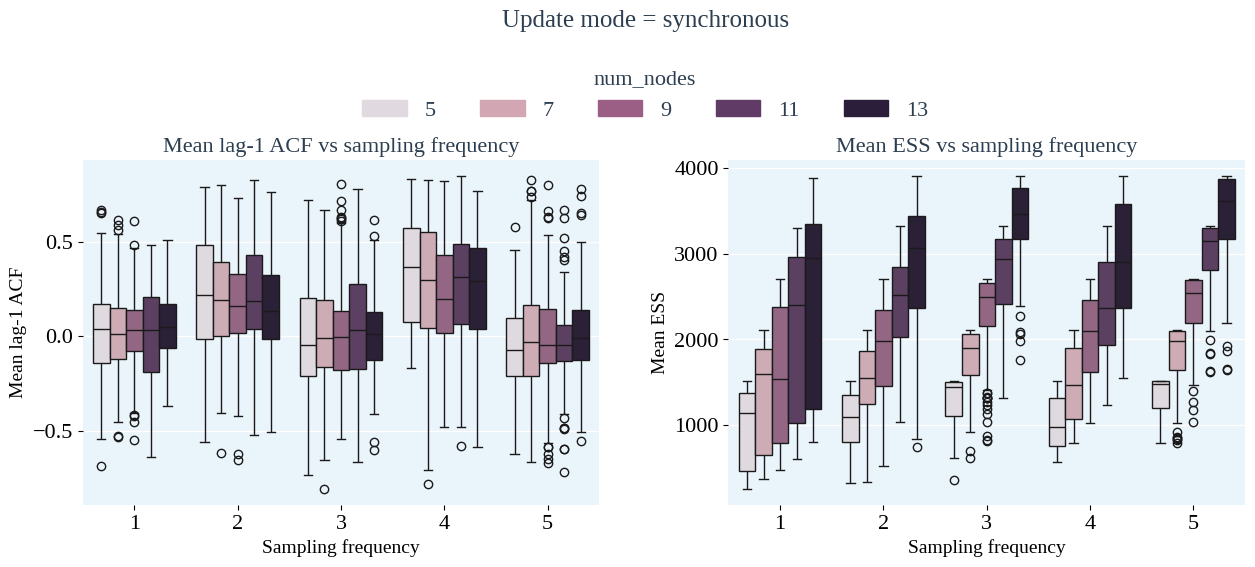

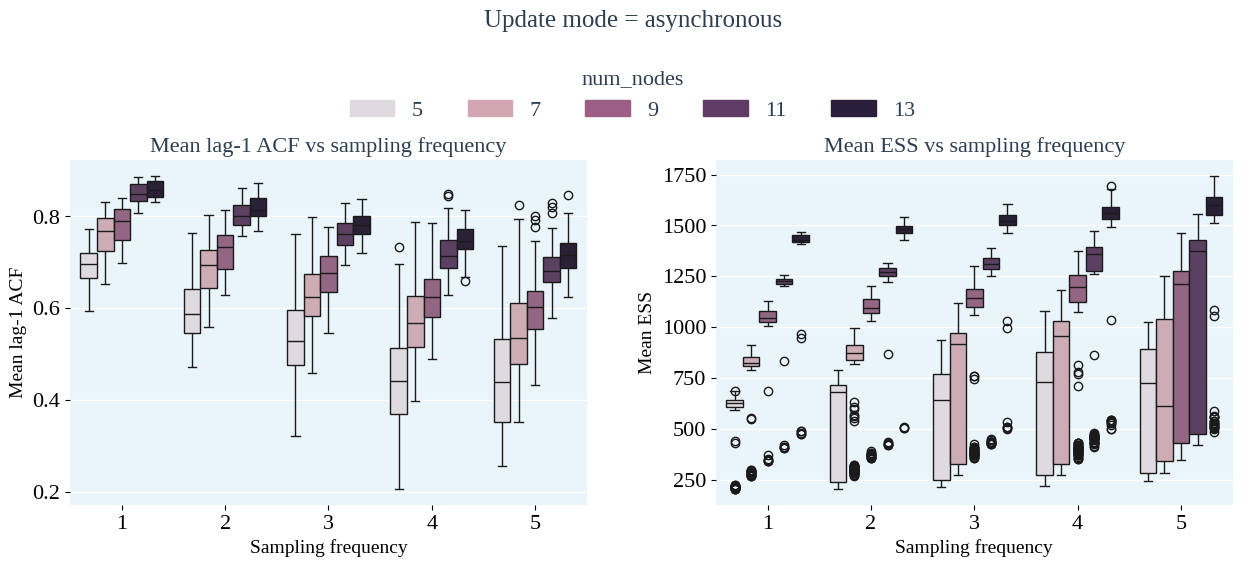

In [7]:
palette = [
    "#e0d9e0",  # najmniejsze num_nodes
    "#d3a6b3",
    "#9b5f86",
    "#5f3b66",
    "#2b1e3a"   # największe num_nodes
]


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["font.family"] = "Liberation Serif"

num_node_levels = sorted(df_series["num_nodes"].unique())

for update_mode in df_series["update_mode"].unique():

    df_sub = df_series[df_series["update_mode"] == update_mode]

    # ===== GLOBALNE ZAKRESY Y =====
    acf_min, acf_max = df_sub["mean_lag1_acf"].min(), df_sub["mean_lag1_acf"].max()
    ess_min, ess_max = df_sub["mean_ess"].min(), df_sub["mean_ess"].max()

    acf_pad = 0.05 * (acf_max - acf_min)
    ess_pad = 0.05 * (ess_max - ess_min)

    fig, axes = plt.subplots(
        1, 2,
        figsize=(15, 5),
        sharex=True
    )

    # ===== LEFT: ACF =====
    plot_boxplot(
        df=df_sub,
        x="sampling_frequency",
        y="mean_lag1_acf",
        hue="num_nodes",
        title="Mean lag-1 ACF vs sampling frequency",
        palette=palette,
        ax=axes[0],
        show_legend=False
    )
    axes[0].set_ylim(acf_min - acf_pad, acf_max + acf_pad)
    axes[0].set_xlabel("Sampling frequency")
    axes[0].set_ylabel("Mean lag-1 ACF")

    # ===== RIGHT: ESS =====
    plot_boxplot(
        df=df_sub,
        x="sampling_frequency",
        y="mean_ess",
        hue="num_nodes",
        title="Mean ESS vs sampling frequency",
        palette=palette,
        ax=axes[1],
        show_legend=False
    )
    axes[1].set_ylim(ess_min - ess_pad, ess_max + ess_pad)
    axes[1].set_xlabel("Sampling frequency")
    axes[1].set_ylabel("Mean ESS")

    # ===== JEDNA LEGENDA (num_nodes) =====
    handles = [
        mpatches.Patch(color=palette[i], label=str(num_node_levels[i]))
        for i in range(len(num_node_levels))
    ]

    fig.legend(
        handles=handles,
        title="num_nodes",
        loc="upper center",
        bbox_to_anchor=(0.5, 1.02),
        ncol=len(num_node_levels),
        frameon=False
    )

    fig.suptitle(
        f"Update mode = {update_mode}",
        fontsize=18,
        y=1.10
    )

    fig.subplots_adjust(
        top=0.80,
        wspace=0.25
    )

    plt.show()


Analiza 3

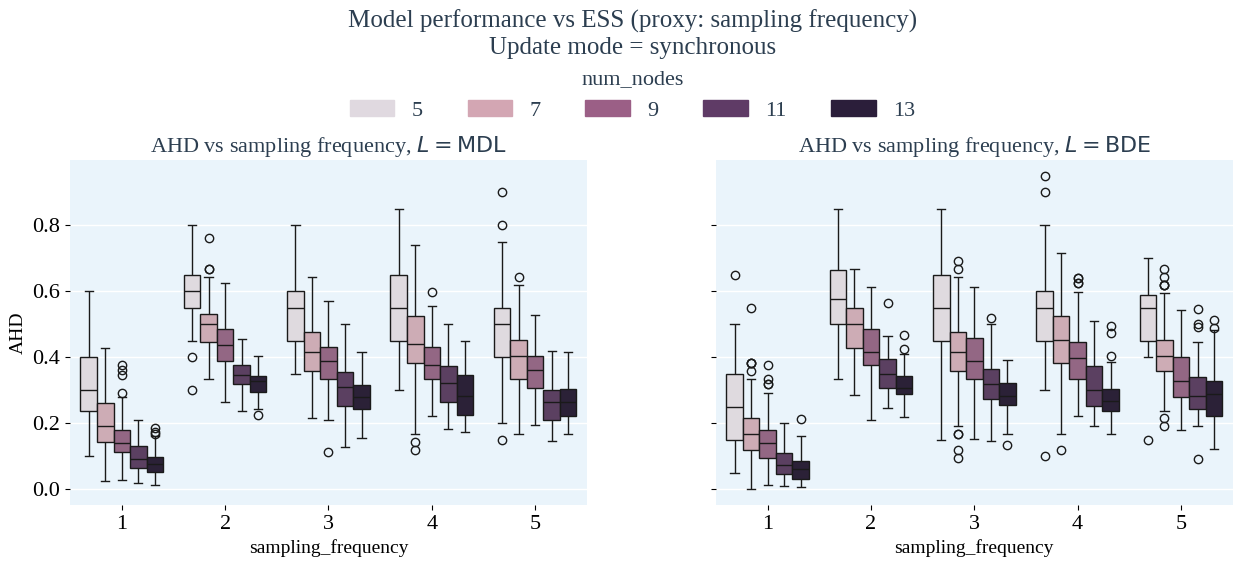

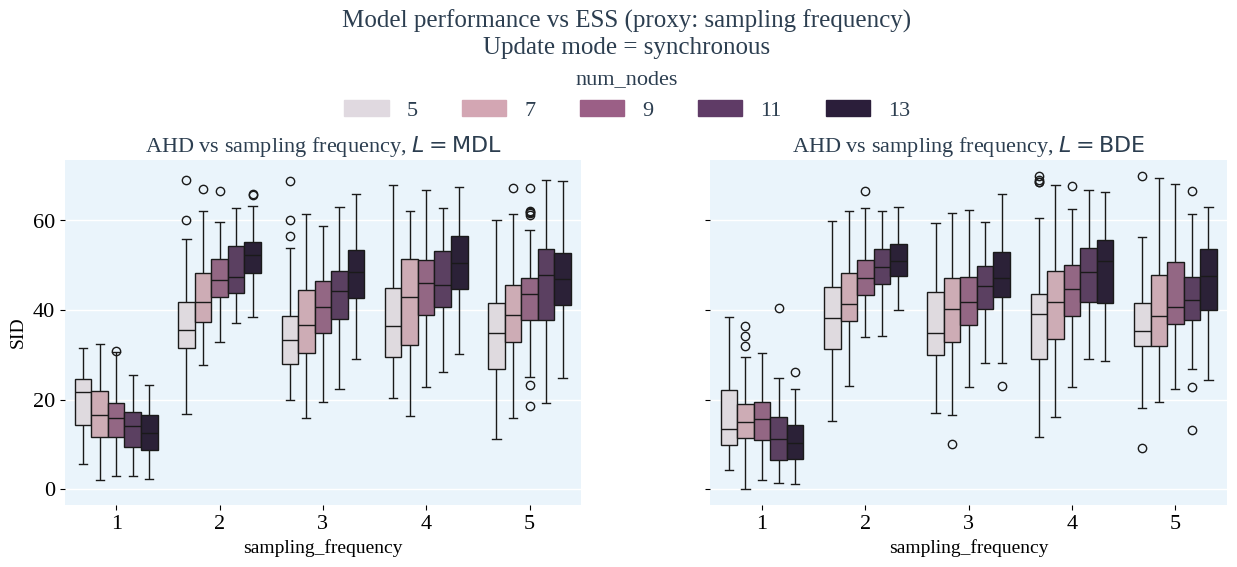

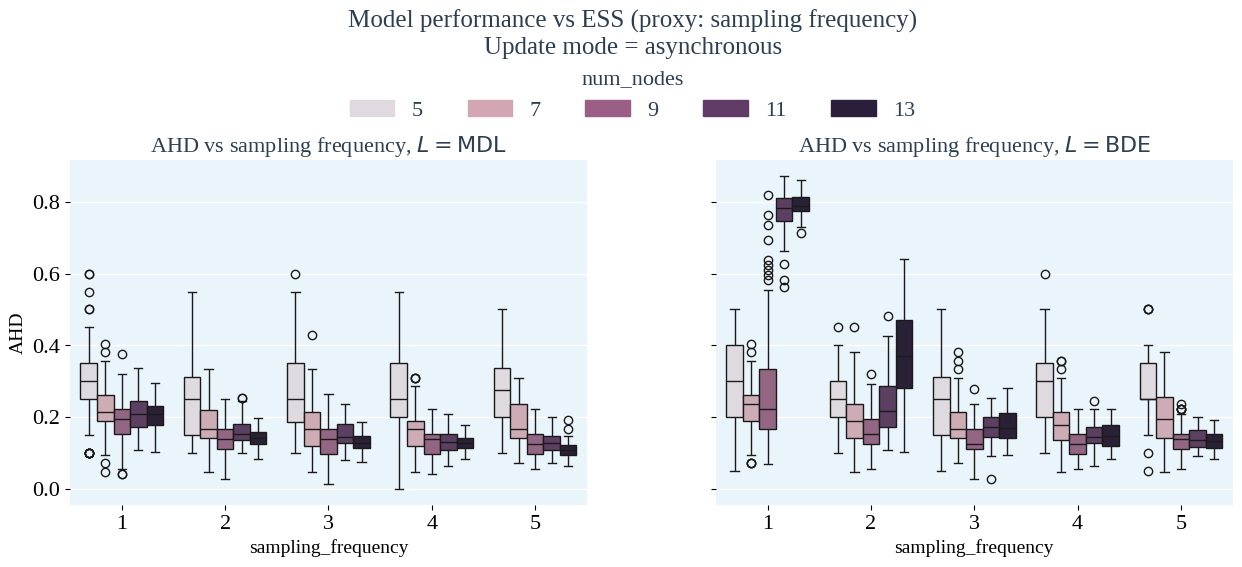

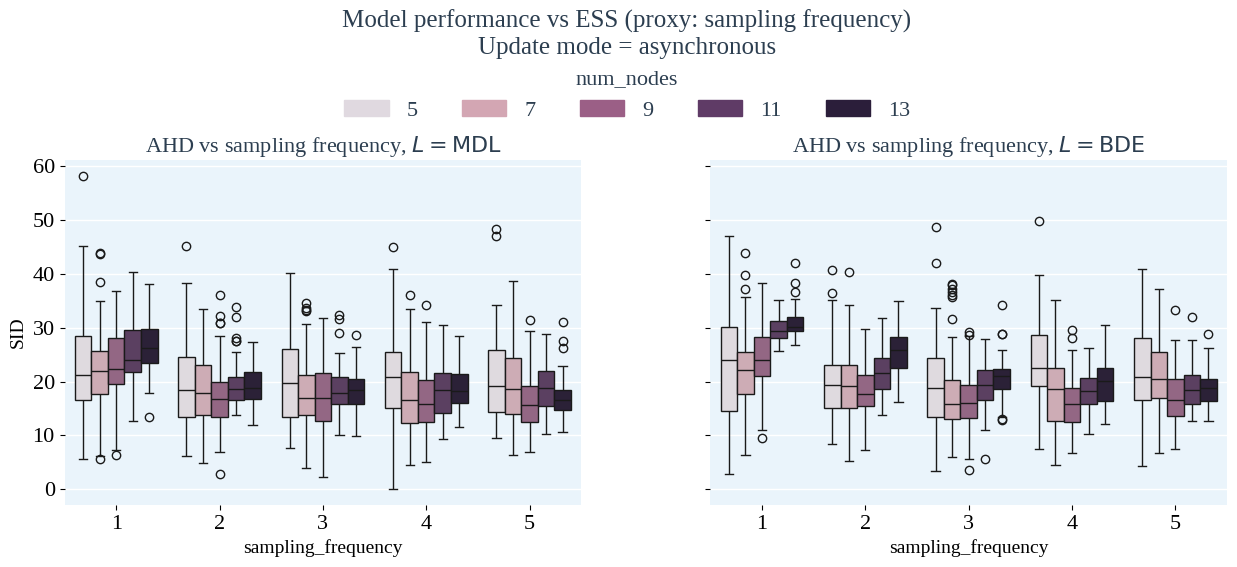

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["font.family"] = "Liberation Serif"

num_node_levels = sorted(df_series["num_nodes"].unique())

for update_mode in df_series["update_mode"].unique():
    for metric in ['AHD', 'SID']:

        df_sub = df_series[df_series["update_mode"] == update_mode]

        # ===== GLOBALNY ZAKRES Y =====
        y_min = df_sub[metric].min()
        y_max = df_sub[metric].max()
        padding = 0.05 * (y_max - y_min)

        fig, axes = plt.subplots(
            1, 2,
            figsize=(15, 5),
            sharey=True   # <-- kluczowe
        )

        # ===== LEFT: MDL =====
        plot_boxplot(
            df=df_sub[df_sub["score_function"] == "MDL"],
            x="sampling_frequency",
            y=metric,
            hue="num_nodes",
            title=r"AHD vs sampling frequency, $L=\mathrm{MDL}$",
            palette=palette,
            ax=axes[0],
            show_legend=False
        )

        # ===== RIGHT: BDE =====
        plot_boxplot(
            df=df_sub[df_sub["score_function"] == "BDE"],
            x="sampling_frequency",
            y=metric,
            hue="num_nodes",
            title=r"AHD vs sampling frequency, $L=\mathrm{BDE}$",
            palette=palette,
            ax=axes[1],
            show_legend=False
        )

        # ===== WYMUSZAMY TĘ SAMĄ SKALĘ =====
        for ax in axes:
            ax.set_ylim(y_min - padding, y_max + padding)

        # ===== JEDNA LEGENDA =====
        handles = [
            mpatches.Patch(color=palette[i], label=str(num_node_levels[i]))
            for i in range(len(num_node_levels))
        ]

        fig.legend(
            handles=handles,
            title="num_nodes",
            loc="upper center",
            bbox_to_anchor=(0.5, 1.02),
            ncol=len(num_node_levels),
            frameon=False
        )

        fig.suptitle(
            f"Model performance vs ESS (proxy: sampling frequency)\n"
            f"Update mode = {update_mode}",
            fontsize=18,
            y=1.10
        )

        fig.subplots_adjust(
            top=0.80,
            wspace=0.25
        )

        plt.show()


Analiza 3

In [43]:
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np

def paired_wilcoxon(
    df,
    metric,
    sf1,
    sf2
):
    """
    Parowany test Wilcoxona: sf2 vs sf1
    H1: sf2 < sf1 (im mniejsza metryka, tym lepiej)
    """

    df1 = df[df["sampling_frequency"] == sf1]
    df2 = df[df["sampling_frequency"] == sf2]

    merged = df1.merge(
        df2,
        on=["rep_id", "num_nodes", "update_mode", "score_function"],
        suffixes=(f"_{sf1}", f"_{sf2}")
    )

    if len(merged) < 10:
        return None

    x = merged[f"{metric}_{sf1}"]
    y = merged[f"{metric}_{sf2}"]

    stat, p = wilcoxon(
        x - y,
        alternative="greater"  # sf2 < sf1
    )

    return {
        "metric": metric,
        "sf_from": sf1,
        "sf_to": sf2,
        "n_pairs": len(merged),
        "wilcoxon_stat": stat,
        "p_value": p,
        "median_diff": np.median(y - x)
    }


In [63]:
results = []

for update_mode in df_series["update_mode"].unique():
    for score_function in df_series["score_function"].unique():
        for metric in ["AHD", "SID"]:
            for sf1, sf2 in [(1,2), (2,3), (3,4), (4,5)]:

                df_sub = df_series[
                    (df_series["update_mode"] == update_mode) &
                    (df_series["score_function"] == score_function)
                ]

                res = paired_wilcoxon(
                    df_sub,
                    metric=metric,
                    sf1=sf1,
                    sf2=sf2
                )

                if res is not None:
                    res["update_mode"] = update_mode
                    res["score_function"] = score_function
                    results.append(res)

df_wilcoxon = pd.DataFrame(results)
update_flag = df_wilcoxon['update_mode'] == 'asynchronous'
df_wilcoxon[update_flag][['metric', 'sf_from', 'sf_to', 'median_diff', 'p_value']].sort_values(['median_diff', 'p_value'], ascending=[True, True])


,metric,sf_from,sf_to,median_diff,p_value
20,SID,1,2,-5.387253,6.773439e-73
29,SID,2,3,-2.590875,4.158768e-26
22,SID,3,4,-0.202943,5.462942e-02
21,SID,2,3,-0.147377,1.485725e-01
24,AHD,1,2,-0.083333,1.229737e-104
16,AHD,1,2,-0.047619,1.553228e-68
25,AHD,2,3,-0.027778,1.042457e-40
17,AHD,2,3,-0.006410,3.664930e-04
18,AHD,3,4,-0.006410,2.654197e-05
26,AHD,3,4,0.000000,2.042976e-02


Analiza 4

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kruskal
import statsmodels.formula.api as smf


def spearman_analysis(df, metric):
    """
    Compute Spearman correlation between mean_ess and a given metric.
    """
    rho, pval = spearmanr(df["mean_ess"], df[metric])
    return rho, pval

def signif_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""


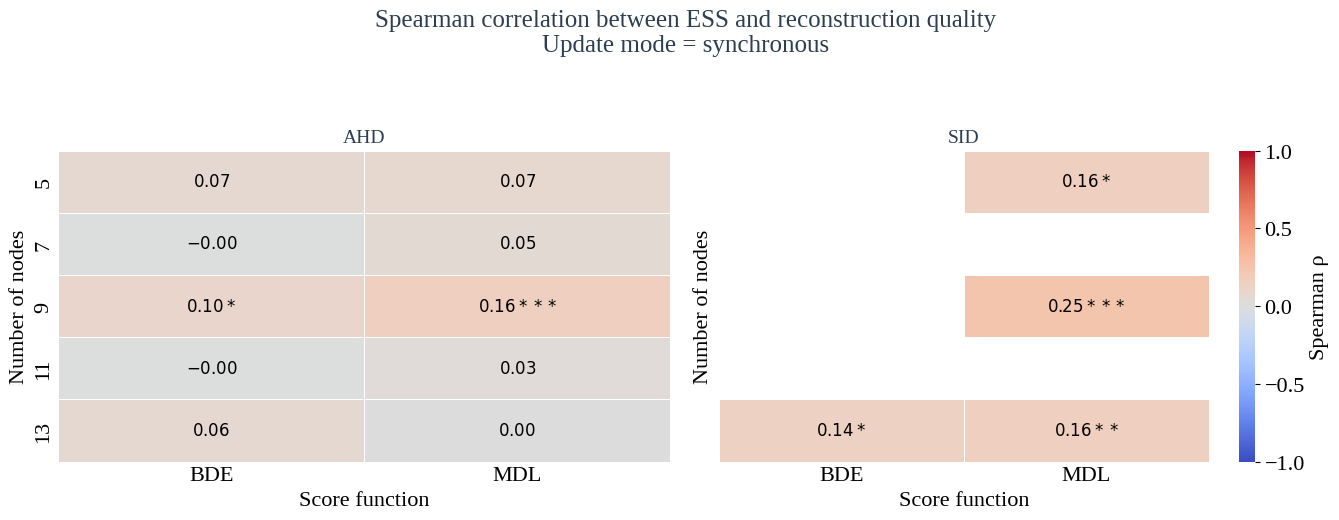

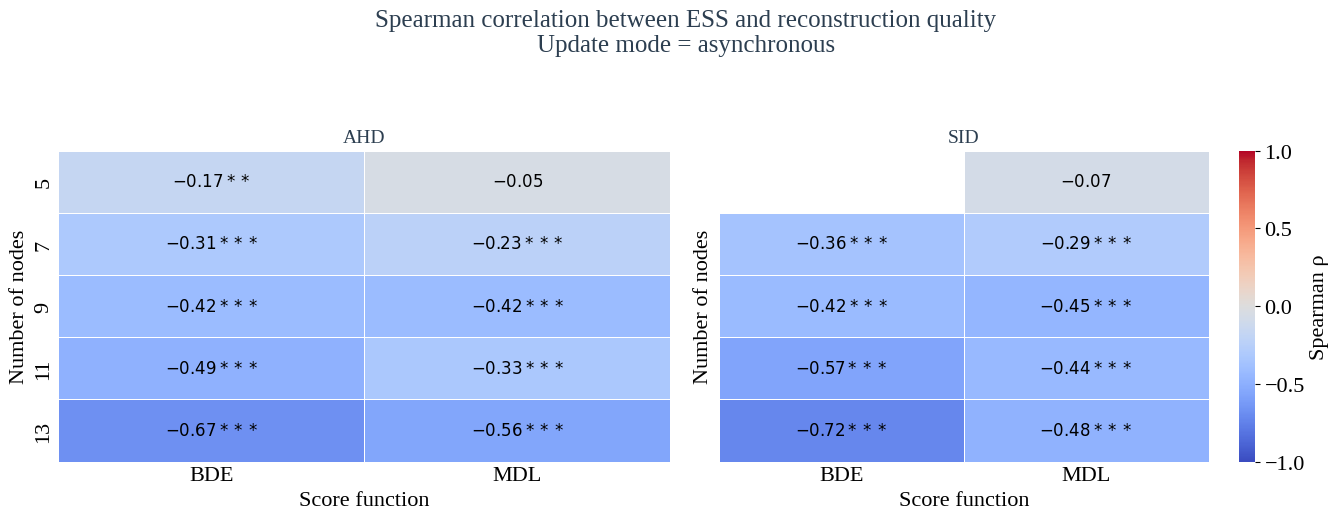

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Liberation Serif"

def signif_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

metrics = ["AHD", "SID"]

for update_mode in ["synchronous", "asynchronous"]:

    fig, axes = plt.subplots(
        1, 2,
        figsize=(14, 5),
        sharey=True
    )

    for i, metric in enumerate(metrics):

        df_sub = df_spearman[
            (df_spearman["update_mode"] == update_mode) &
            (df_spearman["metric"] == metric)
        ]

        pivot_rho = df_sub.pivot_table(
            index="num_nodes",
            columns="score_function",
            values="spearman_rho"
        )

        pivot_p = df_sub.pivot_table(
            index="num_nodes",
            columns="score_function",
            values="p_value"
        )

        # ===== FIX =====
        all_nodes = sorted(df_series["num_nodes"].unique())
        pivot_rho = pivot_rho.reindex(all_nodes)
        pivot_p   = pivot_p.reindex(all_nodes)

        ax = axes[i]

        sns.heatmap(
            pivot_rho,
            cmap="coolwarm",
            center=0,
            vmin=-1,
            vmax=1,
            cbar=(i == 1),
            cbar_kws={"label": "Spearman ρ"},
            ax=ax,
            annot=False,
            linewidths=0.5,
            linecolor="white"
        )

        # === IDEALNIE WYŚRODKOWANE ADNOTACJE ===
        for y_idx, num_nodes in enumerate(pivot_rho.index):
            for x_idx, score in enumerate(pivot_rho.columns):
                rho = pivot_rho.loc[num_nodes, score]
                p = pivot_p.loc[num_nodes, score]

                if pd.notna(rho):
                    label = f"${rho:.2f}{signif_stars(p)}$"
                    ax.text(
                        x_idx + 0.5,
                        y_idx + 0.5,
                        label,
                        ha="center",
                        va="center",
                        fontsize=12,
                        color="black"
                    )

        ax.set_title(metric, fontsize=14)
        ax.set_xlabel("Score function")
        ax.set_ylabel("Number of nodes")

        # Czyścimy ticki pomocnicze
        ax.tick_params(axis="both", which="both", length=0)

    fig.suptitle(
        f"Spearman correlation between ESS and reconstruction quality\n"
        f"Update mode = {update_mode}",
        fontsize=18,
        y=1.05
    )

    plt.tight_layout()
    plt.show()


Analiza 4

In [41]:
def run_regression(df, metric):
    """
    Linear regression: metric ~ mean_ess + num_nodes + score_function
    """
    model = smf.ols(
        formula=f"{metric} ~ mean_ess + num_nodes + C(score_function)",
        data=df
    ).fit()
    return model


IDEA DLA JOANNY 

In [ ]:
df_summary = (
    df
    .groupby(["trajectory_length", "num_nodes"])
    .agg(
        median_ar=("attractor_ratio", "median"),
        q25_ar=("attractor_ratio", lambda x: x.quantile(0.25)),
        mean_ar=("attractor_ratio", "mean"),
        std_ar=("attractor_ratio", "std"),
        n=("attractor_ratio", "size")
    )
    .reset_index()
)
df_summary["scale_ratio"] = (
    df_summary["trajectory_length"] / df_summary["num_nodes"]
)

In [ ]:
# trzeba wywalić wszystkie dane które mają za dużo atraktorów
# czyli wszystkie se scale ratio < 2 możemy wziąć tylko wtedy 

In [ ]:
df_summary["scale_ratio"] = (
    df_summary["trajectory_length"] / df_summary["num_nodes"]
)
df_summary

,trajectory_length,num_nodes,median_ar,q25_ar,mean_ar,std_ar,n,scale_ratio
0,10,5,0.876246,0.667560,0.785662,0.205530,600,2.000000
1,10,7,0.791190,0.491120,0.690165,0.273711,600,1.428571
2,10,9,0.698704,0.289782,0.594321,0.322780,600,1.111111
3,10,11,0.634766,0.168255,0.540005,0.350391,600,0.909091
4,10,13,0.551619,0.098029,0.486880,0.363200,600,0.769231
5,15,5,0.919281,0.800633,0.853411,0.164220,600,3.000000
6,15,7,0.860757,0.602486,0.756670,0.241930,600,2.142857
7,15,9,0.810556,0.460341,0.692933,0.280490,600,1.666667
8,15,11,0.768473,0.332034,0.637546,0.321061,600,1.363636
9,15,13,0.714176,0.199570,0.576234,0.355616,600,1.153846


<Axes: xlabel='scale_ratio', ylabel='median_ar'>

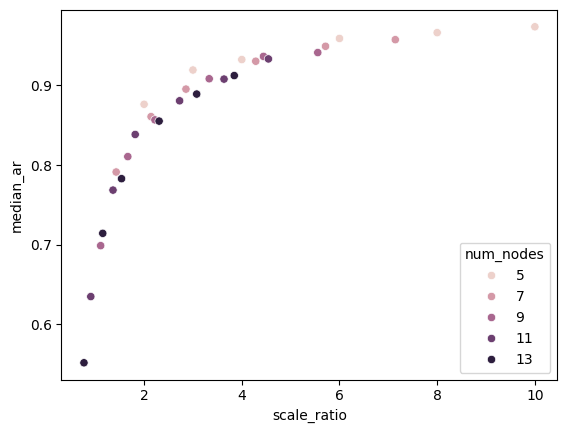

In [21]:
import seaborn as sns
sns.scatterplot(
    data=df_summary,
    x="scale_ratio",
    y="median_ar",
    hue="num_nodes"
)


<Axes: xlabel='trajectory_length', ylabel='num_nodes'>

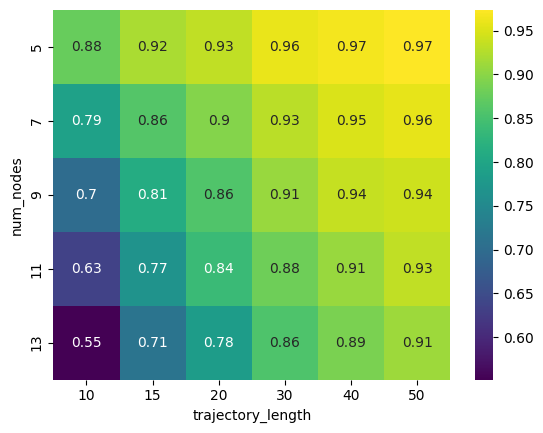

In [22]:
pivot = df_summary.pivot(
    index="num_nodes",
    columns="trajectory_length",
    values="median_ar"
)

sns.heatmap(pivot, cmap="viridis", annot=True)
